## (a)Perform the following commands

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr


rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

β0=2 , β1=0.3 , Intercept=2

## (b)What is the correlation between x1 and x2?Creat a scatterplot displaying the relationship between the variables

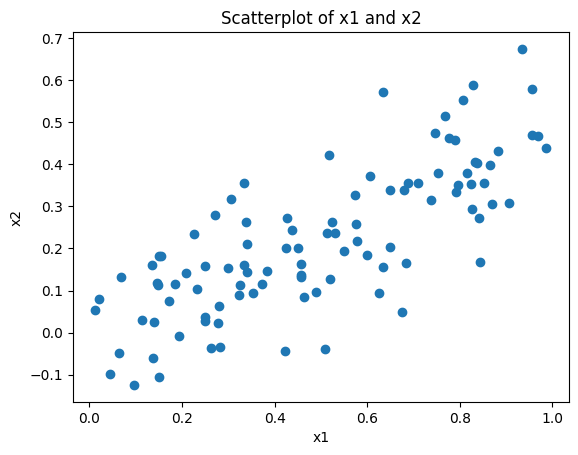

Correlation between x1 and x2: 0.772324497691354


In [4]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 and x2')
plt.show()

corr, _ = pearsonr(x1, x2)
print("Correlation between x1 and x2:", corr)

## (c)Use this data to fit a least squares regression to predict y using x1 and x2.What are (β^)0 , (β^)1 and (β^)2?How do these relate to the true β0,β1 and β2?Can you reject the null hypothesis H0:β1=0?How about H0:β2=0?

In [7]:
X = np.column_stack((x1, x2))
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print("\nRegression summary using both x1 and x2:\n", model.summary())


Regression summary using both x1 and x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        00:35:39   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
#The discover:
#1.((β^)0,(β^)1,(β^)2)=(1.95,1.61,0.94) , (β0,β1,β2)=(2,2,0.3)
#2.The p-value of x1 is 0.003 which is smallar than 0.05.Then we can say we reject H0.Means that there is no evidence to show β1=0.
#3.The p-value of x2 is 0.26 which is bigger than 0.05.Then we can say we failed to reject H0.Means that there is a sufficient evidence to show β2=0.

## (d)Now fit a least squares regression to predict y using x1 only.Can you reject the null hypothesis H0:β1=0?

In [8]:
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()
print("\nRegression summary using only x1:\n", model_x1.summary())


Regression summary using only x1:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        00:52:44   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

The p-value of x1 is 0 which is smallar than 0.05.Then we can say we reject H0.Means that there is no evidence to show β1=0.

## (e)Now fit a least squares regression to predict y using x2 only.Can you reject the null hypothesis H0:β1=0?

In [9]:
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()
print("\n(e) Regression summary using only x2:\n", model_x2.summary())


(e) Regression summary using only x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        00:54:54   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

The p-value of x2 is 0 which is smallar than 0.05.Then we can say we reject H0.Means that there is no evidence to show β1=0.Same result as (d)

## (f)Do the result (c)~(e) contradict each other?

I think no contradict. Obviously , x1 has strong effect in hypothesis test , so does x2 when use it oneself. But x2 has weak effect when using x1 and x2 simutaneously but x1 still strong.

## (g)Suppose we obtain one additional observation,which was unfortunately mismeasured.Re-fit the model from (c)~(e) using new data.In each model,what effect does this observation have on each of the model?

In [9]:
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

#Refit the models with the new data
X_new = np.column_stack((x1_new, x2_new))
X_new = sm.add_constant(X_new)
model_new = sm.OLS(y_new, X_new).fit()

X_x1_new = sm.add_constant(x1_new)
model_x1_new = sm.OLS(y_new, X_x1_new).fit()

X_x2_new = sm.add_constant(x2_new)
model_x2_new = sm.OLS(y_new, X_x2_new).fit()

print("\nRegression summary after adding new observation:")
print("\nUsing x1 and x2:\n", model_new.summary())


(g) Regression summary after adding new observation:

Using x1 and x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        20:43:49   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [10]:
print("\nUsing only x1:\n", model_x1_new.summary())


Using only x1:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           9.23e-07
Time:                        20:43:52   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201   

In [11]:
print("\nUsing only x2:\n", model_x2_new.summary())


Using only x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.13e-08
Time:                        20:44:05   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151   

In [12]:
#Get influence measures
influence = model_new.get_influence()

#Get standardized residuals and hat values (leverage)
standardized_residuals = influence.resid_studentized_internal
hat_values = influence.hat_matrix_diag


new_obs_index = len(y_new) - 1
print(f"Standardized Residual for the new observation: {standardized_residuals[new_obs_index]}")
print(f"Leverage (Hat Value) for the new observation: {hat_values[new_obs_index]}")


if abs(standardized_residuals[new_obs_index]) > 3:
    print("The new observation is an outlier.")
else:
    print("The new observation is not an outlier.")


leverage_threshold = 2 * (X_new.shape[1]) / len(X_new)  #leverage > 2 * (k+1)/n is considered high
if hat_values[new_obs_index] > leverage_threshold:
    print("The new observation is a high-leverage point.")
else:
    print("The new observation is not a high-leverage point.")


Standardized Residual for the new observation: 2.6925574489456636
Leverage (Hat Value) for the new observation: 0.3476716196142664
The new observation is not an outlier.
The new observation is a high-leverage point.
